In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_milan_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Milan')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/milan_{date}.csv',index=False)
get_listings_milan_timeseries()

In [4]:
# pull in detailed_listings
raw_df_milan = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_milan)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(milan_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17634 AirBnb listings.


In [5]:
milan_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2020-12.csv')
milan_raw_df_12_12_2020.shape





(18659, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for milan
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_milan = glob.glob('milan/**.csv')
files_milan

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['milan/Milan_2020-12.csv',
 'milan/Milan_2021-09.csv',
 'milan/Milan_2021-08.csv',
 'milan/Milan_2021-06.csv',
 'milan/Milan_2021-07.csv',
 'milan/Milan_2021-04.csv',
 'milan/Milan_2021-10.csv',
 'milan/Milan_2021-01.csv',
 'milan/Milan_2021-03.csv',
 'milan/Milan_2021-02.csv']

In [7]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

milan_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(milan_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(milan_raw_df_12_12_2020['price'].mean(),2)}.")

milan_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(milan_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_1_9_2021['price'].mean(),2)}.")

milan_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(milan_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_2_8_2021['price'].mean(),2)}.")

milan_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(milan_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_3_4_2021['price'].mean(),2)}.")

milan_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(milan_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_4_9_2021['price'].mean(),2)}.")

#milan_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(milan_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_5_19_2021['price'].mean(),2)}.")

milan_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(milan_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_6_3_2021['price'].mean(),2)}.")

milan_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(milan_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_7_4_2021['price'].mean(),2)}.")

milan_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(milan_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_8_6_2021['price'].mean(),2)}.")

milan_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(milan_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_9_7_2021['price'].mean(),2)}.")

milan_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(milan_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_10_6_2021['price'].mean(),2)}.")

#milan_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/milan/milan_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(milan_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(milan_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18659 AirBnb listings; the avg price is €112.84.
The 1_9_2021 dataset contains 18572 AirBnb listings; the avg price is €112.05.
The 2_8_2021 dataset contains 18367 AirBnb listings; the avg price is €115.4.
The 3_4_2021 dataset contains 18160 AirBnb listings; the avg price is €113.68.
The 4_9_2021 dataset contains 18582 AirBnb listings; the avg price is €116.48.
The 6_3_2021 dataset contains 18029 AirBnb listings; the avg price is €116.37.
The 7_4_2021 dataset contains 18322 AirBnb listings; the avg price is €115.09.
The 8_6_2021 dataset contains 18282 AirBnb listings; the avg price is €118.93.
The 9_7_2021 dataset contains 17705 AirBnb listings; the avg price is €124.73.
The 10_6_2021 dataset contains 17231 AirBnb listings; the avg price is €126.6.


In [8]:
df_list_milan = [milan_raw_df_12_12_2020, milan_raw_df_1_9_2021, milan_raw_df_2_8_2021,
           milan_raw_df_3_4_2021, milan_raw_df_4_9_2021, milan_raw_df_6_3_2021, milan_raw_df_7_4_2021,
           milan_raw_df_8_6_2021, milan_raw_df_9_7_2021, milan_raw_df_10_6_2021]

dates_milan = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_milan = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_milan = []

def airbnb_parse_milan(df_list, files):
    for file in files_milan:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/milan/milan_{file}.csv")
        print(f"The {file} milan dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_milan(df_list, dates):
    for file in files_milan:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/milan/milan_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_milan.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_milan)

milan_parse = airbnb_parse_milan(df_list_milan, files_milan)


The 2020-12 milan dataset contains 18659 AirBnb listings -- the avg price is €112.84.
The 2021-01 milan dataset contains 18572 AirBnb listings -- the avg price is €112.05.
The 2021-02 milan dataset contains 18367 AirBnb listings -- the avg price is €115.4.
The 2021-03 milan dataset contains 18160 AirBnb listings -- the avg price is €113.68.
The 2021-04 milan dataset contains 18582 AirBnb listings -- the avg price is €116.48.
The 2021-06 milan dataset contains 18029 AirBnb listings -- the avg price is €116.37.
The 2021-07 milan dataset contains 18322 AirBnb listings -- the avg price is €115.09.
The 2021-08 milan dataset contains 18282 AirBnb listings -- the avg price is €118.93.
The 2021-09 milan dataset contains 17705 AirBnb listings -- the avg price is €124.73.
The 2021-10 milan dataset contains 17231 AirBnb listings -- the avg price is €126.6.


In [9]:
milan_summary = airbnb_to_frame_milan(df_list_milan, files_milan)
milan_summary['Date of scrape'] = pd.to_datetime(milan_summary['Date of scrape'])
milan_summary['City'] = 'milan'
milan_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,18659,112.84,73.0,8,11304,0.87,milan
1,2021-01-01,18572,112.05,70.0,8,10621,0.84,milan
2,2021-02-01,18367,115.40,73.0,8,10617,0.81,milan
3,2021-03-01,18160,113.68,71.0,8,10731,0.80,milan
4,2021-04-01,18582,116.48,73.0,8,11398,0.76,milan
5,2021-06-01,18029,116.37,73.0,8,11999,0.79,milan
6,2021-07-01,18322,115.09,73.5,8,11999,0.80,milan
7,2021-08-01,18282,118.93,75.0,8,11999,0.85,milan
8,2021-09-01,17705,124.73,80.0,9,11999,0.92,milan
9,2021-10-01,17231,126.60,80.0,9,11999,0.97,milan


In [10]:
master_df_milan = pd.concat(df_list_milan)
master_df_milan_unique = master_df_milan.drop_duplicates(subset='id')
master_df_milan_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44195,9.17797,Private room,100,4,12,2019-04-13,0.09,1,358,NaN,NaN
1,18429,Best Opportunity MPX-EXPO-CENTER,66856,Simone,NaN,BOVISA,45.50480,9.16199,Entire home/apt,150,2,1,2018-08-07,0.03,1,267,NaN,NaN
2,23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,NAVIGLI,45.44991,9.17597,Entire home/apt,150,1,15,2020-09-07,0.14,1,1,NaN,NaN
3,32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51988,9.22310,Entire home/apt,75,3,15,2018-07-01,0.12,4,173,NaN,NaN
4,32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51942,9.22615,Entire home/apt,71,3,29,2019-07-07,0.23,4,364,NaN,NaN


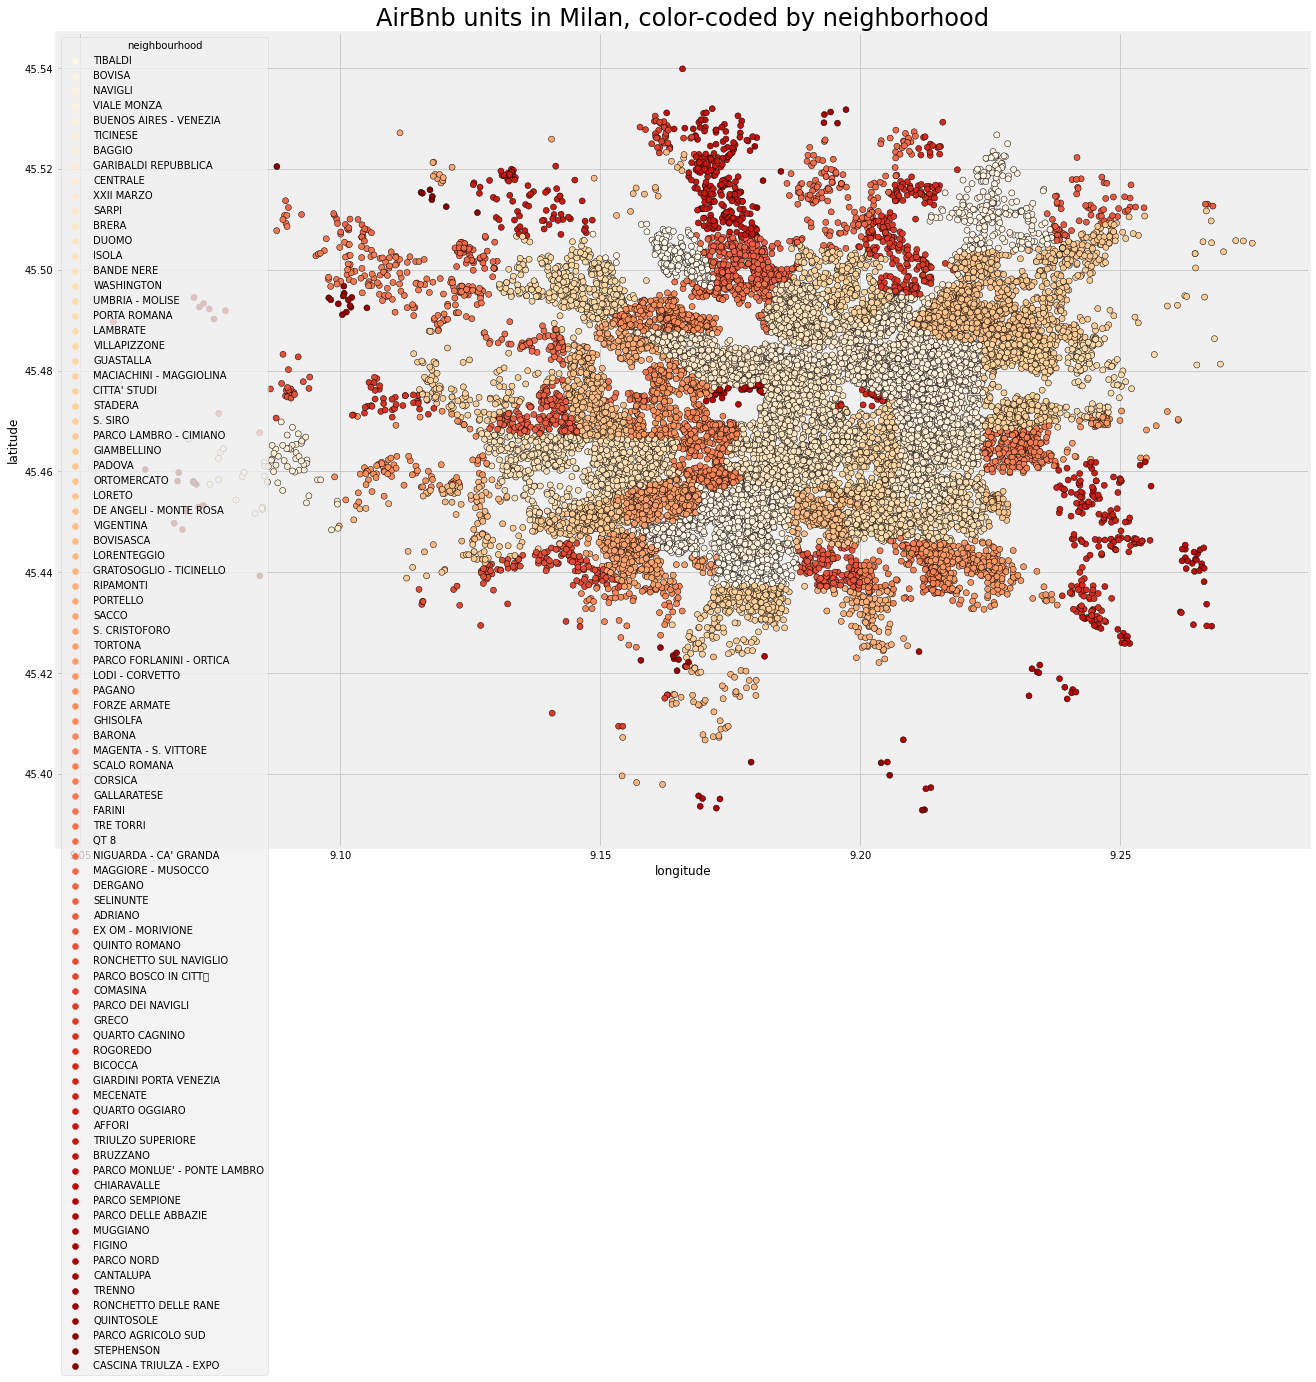

In [11]:
title = 'AirBnb units in Milan, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_milan_unique.longitude, master_df_milan_unique.latitude, hue = master_df_milan_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_milan.png')
plt.show()

## Add review data through a join

In [12]:
df_reviews = pd.concat([milan_raw_df_10_6_2021,raw_df_milan],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6400.0,The Studio Milan,13822.0,Francesca,NaN,TIBALDI,45.44119,9.17813,Private room,100.0,...,4.91,4.81,4.80,4.89,4.77,4.85,f,0,1,0
1,23986.0,""" Characteristic Milanese flat""",95941.0,Jeremy,NaN,NAVIGLI,45.44806,9.17373,Entire home/apt,150.0,...,4.72,4.56,4.75,4.82,4.21,4.67,f,0,2,0
2,28300.0,nice flat near the park,121663.0,Marta,NaN,SARPI,45.47647,9.17359,Private room,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,f,5,1,0
3,37256.0,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,119002.0,Giancarlo,NaN,BUENOS AIRES - VENEZIA,45.46884,9.20777,Private room,55.0,...,4.75,4.83,5.00,5.00,5.00,4.83,f,1,0,0
4,40470.0,Giacinto Cosy & clean flat near MM1,174203.0,Giacinto,NaN,VIALE MONZA,45.52023,9.22747,Entire home/apt,75.0,...,4.81,4.92,4.78,4.71,4.70,4.72,f,0,1,0
5,42732.0,Darsena Design district RESERVABLE FOR MAX 15 DAYS,186608.0,Francesco,NaN,MAGENTA - S. VITTORE,45.45814,9.17654,Entire home/apt,220.0,...,4.33,4.33,4.83,4.50,4.33,4.50,f,5,1,0
6,46536.0,Nico & Cinzia's Pink Suite!,138683.0,Nico&Cinzia,NaN,VIALE MONZA,45.52276,9.22478,Entire home/apt,76.0,...,4.14,4.38,4.63,4.63,4.88,4.25,f,1,0,0
7,55055.0,BEAUTIFUL MODERN ATTIC CENTER OF MI,246217.0,Cristina,NaN,BUENOS AIRES - VENEZIA,45.48096,9.21686,Entire home/apt,145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,2,0
8,59226.0,Near Piazza Gae Aulenti silent e reserved flat,244087.0,Francesca,NaN,CENTRALE,45.48201,9.19809,Entire home/apt,100.0,...,4.71,4.67,4.54,4.86,4.95,4.67,t,9,0,0
9,65142.0,Very Nice Luxury Apt Central Milan,318394.0,Angelo,NaN,CENTRALE,45.48027,9.20247,Entire home/apt,53.0,...,4.88,4.86,4.86,4.82,4.90,4.78,f,2,0,0


## Regression

In [13]:
#df_reviews_.columns

In [14]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [15]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  118.91752319641563
Coefficients:  [  0.81986589  -1.90575975   0.22028845   0.11840045  -7.01347938
  23.61705091 -11.32377963  -4.89158417   0.30800752]
LinearRegression()


In [16]:
y_pred2 = regr.predict(X_)

In [17]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
16555,400.0,115.340171,-284.659829
7184,400.0,116.765061,-283.234939
10399,400.0,116.781489,-283.218511
5405,400.0,118.420142,-281.579858
7118,400.0,118.848614,-281.151386


<function matplotlib.pyplot.ylim(*args, **kwargs)>

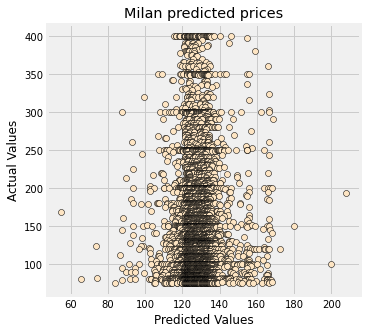

In [18]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Milan predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim